In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align

/home/cikhartj/anaconda3/lib/python3.11/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
system_labels_cg = ["st", "so", "tw", "lp"]
system_labels = ["st", "so", "tw", "lp", "aa"]

In [3]:
CHAINS = ['0', '1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b',
          'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
          'u']

In [4]:
l_subun = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
           'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','0', '1', '2', '3', '4', '5', '6', '7',]
s_subun = ['a', 'b','c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
           's', 't','u']

In [5]:
singlecolor = '#4477AA'

In [6]:
def chain_rmsd(u_ref, u_mob, chain_id):

    sel_ref = u_ref.select_atoms(f"(name BB or name BB1) and (chainID {chain_id})")
    sel_mob = u_mob.select_atoms(f"(name BB or name BB1) and (chainID {chain_id})")
    if sel_ref.n_atoms == 0 or sel_mob.n_atoms == 0:
        return np.nan
    if sel_ref.n_atoms != sel_mob.n_atoms:
        return np.nan

    return rms.rmsd(sel_mob.positions, sel_ref.positions)

chain_rmsds = {}

align_selection = "name BB or name BB1"

for label in system_labels_cg:
    bottom_file = f"./data/{label}_bottom_avg_0.05.pdb"
    top_file = f"./data/{label}_top_avg_0.05.pdb"

    u_bottom = mda.Universe(bottom_file)
    u_top = mda.Universe(top_file)

    rmsd_val, _ = align.alignto(
        u_top, u_bottom,
        select=align_selection
    )

    print(f"{label}: aligned top -> bottom, RMSD before/after: {rmsd_val:.3f} \AA")

    chain_values_rmsd = []
    for ch in CHAINS:
        rmsd_value = chain_rmsd(u_top, u_bottom, ch)
        chain_values_rmsd.append(rmsd_value/10)

    chain_rmsds[label]=chain_values_rmsd

/home/cikhartj/anaconda3/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)


st: aligned top -> bottom, RMSD before/after: 16.724 \AA
so: aligned top -> bottom, RMSD before/after: 25.758 \AA
tw: aligned top -> bottom, RMSD before/after: 36.373 \AA
lp: aligned top -> bottom, RMSD before/after: 18.411 \AA


In [7]:
system_labels_aa = ['aa']

chain_rmsds_aa = {}

align_selection = "name CA or name P"
def chain_rmsd_aa(u_ref, u_mob, chain_id):
    base_sel_ref = u_ref.select_atoms(f"(name CA or name P) and (chainID {chain_id})")
    base_sel_mob = u_mob.select_atoms(f"(name CA or name P) and (chainID {chain_id})")

    first_resid_ref = base_sel_ref.residues[0].resid
    last_resid_ref  = base_sel_ref.residues[-1].resid

    first_resid_mob = base_sel_ref.residues[0].resid
    last_resid_mob  = base_sel_ref.residues[-1].resid
    
    if base_sel_ref.n_atoms == 0 or base_sel_mob.n_atoms == 0:
        return np.nan

    if chain_id in ["A", "B", "a"]:
        sel_ref = base_sel_ref.select_atoms(f"not (resid {first_resid_ref})")
        sel_mob = base_sel_mob.select_atoms(f"not (resid {first_resid_mob})")
    else:
        sel_ref = base_sel_ref.select_atoms(f"not (resid {last_resid_ref})")
        sel_mob = base_sel_mob.select_atoms(f"not (resid {last_resid_mob})")

    if sel_ref.n_atoms == 0 or sel_mob.n_atoms == 0:
        return np.nan
    if sel_ref.n_atoms != sel_mob.n_atoms:
        return np.nan
        
    return rms.rmsd(sel_mob.positions, sel_ref.positions)
for label in system_labels_aa:
    bottom_file = f"./data/{label}_bottom_avg_0.05.pdb"
    top_file = f"./data/{label}_top_avg_0.05.pdb"

    u_bottom = mda.Universe(bottom_file)
    u_top = mda.Universe(top_file)

    rmsd_val, _ = align.alignto(
        u_top, u_bottom,
        select=align_selection
    )

    print(f"{label}: aligned top -> bottom, RMSD before/after: {rmsd_val:.3f} \AA")

    chain_values_rmsd = []
    for ch in CHAINS:
        rmsd_value = chain_rmsd_aa(u_top, u_bottom, ch)
        chain_values_rmsd.append(rmsd_value/10)

    chain_rmsds_aa[label]=chain_values_rmsd

aa: aligned top -> bottom, RMSD before/after: 29.305 \AA


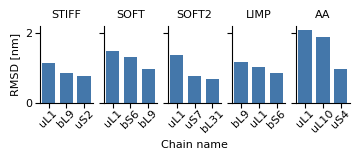

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=len(system_labels_cg) + 1, nrows=1, 
                         figsize=(4.0,1.0),
                         sharey=True, sharex=False)
plt.rcParams['font.family'] = 'Open Sans'
titles = ['STIFF', 'SOFT', 'SOFT2', 'LIMP', 'AA']

for i, label in enumerate(system_labels_cg):
    ax = axes[i]
    yvals = chain_rmsds[label] 

    pairs = list(zip(yvals, CHAINS))
    pairs_sorted = sorted(pairs, key=lambda x: x[0], reverse=True)

    yvals_sorted, chains_sorted = zip(*pairs_sorted)

    xvals = np.arange(len(yvals_sorted))

    ax.bar(xvals[:3], yvals_sorted[:3], color=singlecolor, width=0.75)

    ax.set_xticks(xvals[:3])
    ax.set_xticklabels(chains_sorted[:3], fontsize=8)
    ax.set_xlim(-0.5,2.5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', which='major', pad=0.0)
    
    ax.set_title(f"{titles[i]}", fontsize=8)
    ax.set_yticks([0,2])


ax_aa = axes[-1]
yvals_aa = chain_rmsds_aa['aa']
pairs_aa = list(zip(yvals_aa, CHAINS))
pairs_aa_sorted = sorted(pairs_aa, key=lambda x: x[0], reverse=True)
yvals_aa_sorted, chains_aa_sorted = zip(*pairs_aa_sorted)
xvals_aa = np.arange(len(yvals_aa_sorted))
ax_aa.set_xticks(xvals_aa[:3])

axes[0].set_xticklabels(["uL1","bL9","uS2"], rotation=45, fontsize=8)
axes[1].set_xticklabels(["uL1","bS6","bL9"], rotation=45, fontsize=8)
axes[2].set_xticklabels(["uL1","uS7","bL31"], rotation=45, fontsize=8)
axes[3].set_xticklabels(["bL9","uL1","bS6"], rotation=45, fontsize=8)
axes[4].set_xticklabels(["uL1","uL10","uS4"], rotation=45, fontsize=8)

ax_aa.bar(xvals_aa[:3], yvals_aa_sorted[:3], color=singlecolor, width=0.75)
ax_aa.tick_params(axis='x', which='major', pad=0)

axes[0].tick_params(axis='y', which='major', pad=1.5, labelsize=8)

ax_aa.spines['top'].set_visible(False)
ax_aa.spines['right'].set_visible(False)
ax_aa.set_xlim(-0.5,2.5)
axes[2].set_xlabel('Chain name', fontsize=8)

ax_aa.set_title("AA", fontsize=8)
axes[0].set_ylabel("RMSD [nm]", fontsize=8)

plt.show()
#f...30S r-protein S6;H...50S r-protein L9;b...30S r-protein S2;g...30S r-protein S7;6...50S r-protein L31; 5...50S r-protein L10;d...30S r-protein S4, L1 stalk

In [9]:
def rmsd_total_aa(u_ref, u_mob):
    ref_groups = []
    mob_groups = []

    for chain in CHAINS:
        chain_ref = u_ref.select_atoms(f"(chainID {chain}) and (name CA or name P)")
        chain_mob = u_mob.select_atoms(f"(chainID {chain}) and (name CA or name P)")

        if chain_ref.n_atoms == 0 or chain_mob.n_atoms == 0:
            continue

        if chain in ["A", "B", "a"]:
            chain_ref = chain_ref[1:]
            chain_mob = chain_mob[1:]
        else:
            chain_ref = chain_ref[:-1]
            chain_mob = chain_mob[:-1]

        if chain_ref.n_atoms == 0 or chain_mob.n_atoms == 0:
            continue

        ref_groups.append(chain_ref)
        mob_groups.append(chain_mob)

    if not ref_groups:
        return np.nan

    final_ref = sum(ref_groups[1:], ref_groups[0])
    final_mob = sum(mob_groups[1:], mob_groups[0])

    if final_ref.n_atoms == 0 or final_mob.n_atoms == 0:
        return np.nan
    if final_ref.n_atoms != final_mob.n_atoms:
        return np.nan

    return rms.rmsd(final_mob.positions, final_ref.positions)

In [10]:
def rmsd_total(u_ref, u_mob):
    selection_cg = ' or '.join([f'chainid {chain} and (name BB or name BB1)' for chain in CHAINS])
    sel_ref = u_ref.select_atoms(selection_cg)
    sel_mob = u_mob.select_atoms(selection_cg)
    if sel_ref.n_atoms == 0 or sel_mob.n_atoms == 0:
        return np.nan
    if sel_ref.n_atoms != sel_mob.n_atoms:
        return np.nan
    print(len(sel_ref))

    return rms.rmsd(sel_mob.positions, sel_ref.positions)
    

total_rmsds_lsu = {}

align_selection_cg = ' or '.join([f'chainid {chain} and (name BB or name BB1)' for chain in s_subun])
align_selection_aa = ' or '.join([f'chainid {chain} and (name CA or name P)' for chain in s_subun])

for label in system_labels:
    bottom_file = f"./data/{label}_bottom_avg_0.05.pdb"
    top_file = f"./data/{label}_top_avg_0.05.pdb"

    u_bottom = mda.Universe(bottom_file)
    u_top = mda.Universe(top_file)

    if label == 'aa':
        rmsd_val, _ = rmsd_val, _ = align.alignto(
        u_top, u_bottom,
        select=align_selection_aa
        )
        print(f"{label}: aligned top -> bottom, RMSD before/after: {rmsd_val:.3f} \AA")
    
        total_values_rmsd = []
        rmsd_value = rmsd_total_aa(u_top, u_bottom)
        total_values_rmsd.append(rmsd_value/10)
    
        total_rmsds_lsu[label]=total_values_rmsd
    else:
        rmsd_val, _ = align.alignto(
            u_top, u_bottom,
            select=align_selection_cg
        )

        print(f"{label}: aligned top -> bottom, RMSD before/after: {rmsd_val:.3f} \AA")
    
        total_values_rmsd = []
        rmsd_value = rmsd_total(u_top, u_bottom)
        total_values_rmsd.append(rmsd_value/10)
    
        total_rmsds_lsu[label]=total_values_rmsd

/home/cikhartj/anaconda3/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)


st: aligned top -> bottom, RMSD before/after: 13.327 \AA
10679
so: aligned top -> bottom, RMSD before/after: 20.942 \AA
10679
tw: aligned top -> bottom, RMSD before/after: 31.294 \AA
10679
lp: aligned top -> bottom, RMSD before/after: 11.860 \AA
10679
aa: aligned top -> bottom, RMSD before/after: 19.695 \AA


In [11]:
total_rmsds = {}

align_selection_cg = "(name BB or name BB1)"
align_selection_aa = "(name CA or name P)"

for label in system_labels:
    bottom_file = f"./data/{label}_bottom_avg_0.05.pdb"
    top_file = f"./data/{label}_top_avg_0.05.pdb"

    u_bottom = mda.Universe(bottom_file)
    u_top = mda.Universe(top_file)

    if label == 'aa':
        rmsd_val, _ = rmsd_val, _ = align.alignto(
        u_top, u_bottom,
        select=align_selection_aa
        )
        print(f"{label}: aligned top -> bottom, RMSD before/after: {rmsd_val:.3f} \AA")
    
        total_values_rmsd = []
        rmsd_value = rmsd_total_aa(u_top, u_bottom)
        total_values_rmsd.append(rmsd_value/10)
    
        total_rmsds[label]=total_values_rmsd
    else:
        rmsd_val, _ = align.alignto(
            u_top, u_bottom,
            select=align_selection_cg
        )

        print(f"{label}: aligned top -> bottom, RMSD before/after: {rmsd_val:.3f} \AA")
    
        total_values_rmsd = []
        rmsd_value = rmsd_total(u_top, u_bottom)
        total_values_rmsd.append(rmsd_value/10)
    
        total_rmsds[label]=total_values_rmsd

st: aligned top -> bottom, RMSD before/after: 16.724 \AA
10679
so: aligned top -> bottom, RMSD before/after: 25.758 \AA
10679
tw: aligned top -> bottom, RMSD before/after: 36.373 \AA
10679
lp: aligned top -> bottom, RMSD before/after: 18.411 \AA
10679
aa: aligned top -> bottom, RMSD before/after: 29.305 \AA


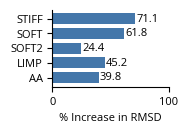

In [12]:
graph_labels=['STIFF','SOFT','SOFT2','LIMP','AA']
labels = system_labels
fig, ax = plt.subplots(figsize=(1.5,1.0))
plt.rcParams['font.family'] = 'Open Sans'
pct_increase = []
x = np.arange(len(labels))
for lbl in labels:
    g_val = total_rmsds[lbl][0]
    l_val = total_rmsds_lsu[lbl][0]
    if g_val == 0:
        inc = 0 
    else:
        inc = (l_val - g_val) / g_val * 100.0
    pct_increase.append(inc)

bars1 = ax.barh(x, pct_increase, height=0.75,color=singlecolor)
for bar in bars1:
  ax.text(
      bar.get_width() + 1,
      bar.get_y() + bar.get_height() / 2,
      round(bar.get_width(), 1),
      verticalalignment='center',
      color="black",
      weight='normal',
      size=8
  )
ax.set_yticks(x)
ax.invert_yaxis()
ax.set_xlim(0,100)
ax.set_xticks([0,100])
ax.set_xticklabels([0,100], fontsize=8)
ax.set_yticklabels(graph_labels, fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("% Increase in RMSD", fontsize=8)
plt.show()